# Competition

##자동차 모델 분류

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. DataSet Load

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'

-rw------- 1 root root 82003032 Mar 24 00:14 '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'


> ## 1) 'DataSet.pkl'

* 압축형식 : 'Gzip'

In [4]:
import pandas as pd

url = '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'
df = pd.read_pickle(url, compression = 'gzip')

df.shape

(24916, 2701)

> ## 2) DataFrame Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24916 entries, 0 to 24915
Columns: 2701 entries, 0 to 2700
dtypes: object(2701)
memory usage: 513.4+ MB


In [ ]:
df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,230,236,252,226,232,248,220,227,245,214,223,240,212,220,241,206,219,238,204,216,240,199,215,238,199,215,241,193,213,238,189,208,238,183,207,235,181,204,236,177,...,28,28,28,23,24,26,18,22,23,18,21,26,17,22,26,14,21,27,13,20,26,11,16,20,15,20,23,20,21,25,22,24,23,37,35,36,55,54,52,G80스포츠
1,235,238,243,251,254,255,251,255,255,242,249,255,239,246,255,248,255,255,247,255,255,238,248,255,246,255,255,249,255,255,251,255,255,249,250,255,248,248,250,251,...,54,59,62,46,53,59,40,47,55,36,45,54,36,44,55,38,46,59,40,48,59,33,39,51,38,45,53,42,45,50,51,52,54,69,70,65,124,123,118,G80스포츠
2,94,112,134,85,103,125,76,97,118,80,101,122,95,116,137,109,130,151,114,137,155,114,137,155,112,133,150,121,143,157,86,105,120,66,86,97,127,145,157,189,...,41,53,65,41,54,63,51,64,73,64,77,86,66,79,88,55,68,76,42,55,63,51,64,70,50,63,69,48,62,65,52,66,69,67,78,82,80,91,95,G80스포츠
3,80,88,90,68,76,78,79,83,84,122,126,125,178,178,178,211,211,209,221,217,214,216,213,208,223,218,214,213,208,202,204,201,194,205,202,195,208,208,200,209,...,53,64,84,54,65,85,52,64,80,55,67,81,66,79,88,77,90,99,84,97,105,64,77,83,63,76,82,63,76,84,84,97,105,82,92,102,104,114,124,G80스포츠
4,215,229,194,212,222,195,210,217,201,217,218,213,226,223,232,229,221,236,222,211,227,213,201,211,213,203,204,216,209,199,221,215,201,218,217,197,210,211,195,205,...,31,47,60,42,58,71,51,67,80,58,72,83,61,75,86,62,76,85,63,77,86,87,101,110,94,108,117,84,99,106,94,109,116,99,114,119,81,96,101,G80스포츠
5,108,156,240,112,159,241,116,162,240,118,162,237,118,157,234,115,157,231,115,158,236,114,161,239,110,163,243,108,163,245,107,164,245,108,163,243,114,163,239,117,...,185,176,167,170,163,153,155,148,138,145,138,128,138,131,121,136,129,119,136,129,119,140,133,125,141,134,126,141,137,128,142,138,129,143,139,130,144,140,131,G80스포츠
6,204,213,228,180,192,206,196,208,220,193,210,220,189,209,220,192,215,229,173,202,220,175,207,232,182,215,248,173,208,246,174,208,253,175,212,255,175,214,255,182,...,191,190,186,180,179,175,167,166,162,156,155,153,154,153,151,158,157,155,164,163,161,157,156,154,158,157,155,159,157,158,160,158,159,160,158,159,160,158,159,G80스포츠
7,209,213,216,186,190,193,206,210,213,204,208,211,201,206,212,218,223,229,205,212,222,204,213,222,175,183,194,137,147,157,159,171,185,195,207,221,171,184,200,154,...,163,165,162,176,178,175,194,196,193,204,206,203,203,205,202,204,206,203,210,212,209,208,210,207,209,211,208,211,213,210,213,215,212,215,217,216,218,220,219,G80스포츠
8,196,207,199,198,209,201,201,212,206,197,208,202,195,204,203,204,213,212,204,212,215,188,195,201,202,206,215,102,106,117,73,76,91,99,102,117,95,96,116,108,...,165,166,152,165,165,153,166,166,156,166,167,159,166,167,162,163,163,161,161,161,163,164,165,169,164,164,172,163,166,175,163,165,177,163,165,180,164,166,181,G80스포츠
9,81,91,92,79,89,90,86,96,95,111,121,120,148,154,154,176,182,182,189,193,192,191,196,192,192,192,190,192,193,188,195,192,187,196,193,188,198,193,189,201,...,173,178,156,172,177,157,174,178,161,174,178,163,171,174,163,172,175,168,174,176,173,169,171,170,170,171,175,170,170,178,171,171,181,171,170,184,172,171,185,G80스포츠


> ## 3) 'X', 'y' 분리

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.shape, y.shape

((24916, 2700), (24916,))

> ## 4) Visualization

* '0'번 인덱스 label 및 이미지

G80스포츠


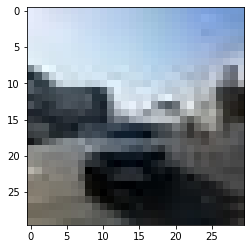

In [6]:
import numpy as np
import matplotlib.pyplot as plt

print(y.iloc[0])

plt.imshow(X.iloc[0].values.astype(np.int).reshape(30,30,3))
plt.show()

* '200'번 인덱스 label 및 이미지

G80스포츠


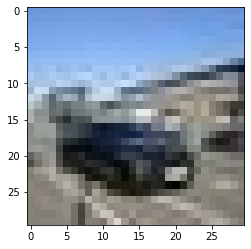

In [ ]:
print(y.iloc[200])

plt.imshow(X.iloc[200].values.astype(np.int).reshape(30,30,3))
plt.show()

* '400'번 인덱스 label 및 이미지

G80스포츠


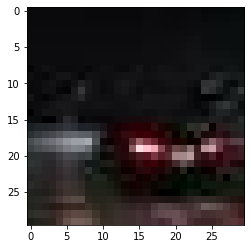

In [ ]:
print(y.iloc[400])

plt.imshow(X.iloc[400].values.astype(np.int).reshape(30,30,3))
plt.show()

# II. Data Preprocessing

In [8]:
y.unique()
# 범주 34개

array(['G80스포츠', 'G90', 'i30', 'KONA 1', '그랜저 IG', '그랜저HG240', '그랜저',
       '더뉴그랜드스타렉스', '더뉴아반떼AD', '맥스크루즈', '벨로스터', '소나타 LF', '소나타 LPI',
       '소나타 NF', '소나타 YF', '소나타 뉴라이즈', '소나타 하이브리드', '소나타', '스타렉스', '싼타페',
       '아반떼 XD', '아반떼AD', '아반떼MD', '아슬란', '아이오닉 일렉트릭', '아이오닉 하이브리드',
       '에쿠스', '엑센트', '제네시스 G70', '제네시스 G80', '제네시스G380', '투싼1', '투싼',
       '팰리세이드'], dtype=object)

- train : valid : test split (6 : 2 : 2)

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 2045)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19932, 2700), (4984, 2700), (19932,), (4984,))

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,
                                                    test_size = 0.2,
                                                    random_state = 2045)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((15945, 2700), (3987, 2700), (15945,), (3987,))

> ## 1) ImageDataGenerator( ) & flow_from_directory( )

- Nomalization
   - ImageDataGenerator( )
- Resizing & Generator
   - flow_from_directory( )

In [9]:
import numpy as np

In [ ]:
print(X_train.shape)

(15945, 2700)


In [10]:
X_train = X_train.values.reshape((15945, 30, 30, 3))
X_valid = X_valid.values.reshape((3987, 30, 30, 3))
X_test = X_test.values.reshape((4984, 30, 30, 3))

X_train.shape, X_valid.shape, X_test.shape

((15945, 30, 30, 3), (3987, 30, 30, 3), (4984, 30, 30, 3))

- Normalization

In [11]:
X_train = X_train.astype(float) / 255
X_valid = X_valid.astype(float) / 255
X_test = X_test.astype(float) / 255

- encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_valid = encoder.fit_transform(y_valid)
y_test = encoder.fit_transform(y_test)

- One_Hot_Encoding


In [13]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# III. Modeling

> ## 1) Model Define

(1) Model_1 

In [14]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers

model_1 = models.Sequential()
model_1.add(layers.Conv2D(filters = 32, padding = 'same', kernel_size = (3, 3), activation = 'relu', input_shape = (30, 30, 3))) 
model_1.add(layers.MaxPool2D((2,2)))
model_1.add(layers.Conv2D(filters = 64, padding = 'same', kernel_size = (3, 3), activation = 'relu')) 
model_1.add(layers.MaxPool2D((2,2)))
model_1.add(layers.Conv2D(filters = 128, padding = 'same', kernel_size = (3, 3), activation = 'relu'))  
model_1.add(layers.MaxPool2D((2,2)))

# DNN 
model_1.add(layers.Flatten())                                  
model_1.add(layers.Dense(units = 512, activation = 'relu'))   
model_1.add(layers.Dense(units = 34, activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

(2) Model_2 : Dropout

In [15]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers

model_2 = models.Sequential(name = 'Drop')
model_2.add(layers.Conv2D(filters = 32, padding = 'same', kernel_size = (3, 3), activation = 'relu', input_shape = (30, 30, 3))) 
model_2.add(layers.MaxPool2D((2,2)))
model_2.add(layers.Conv2D(filters = 64, padding = 'same', kernel_size = (3, 3), activation = 'relu')) 
model_2.add(layers.MaxPool2D((2,2)))
model_2.add(layers.Conv2D(filters = 128, padding = 'same', kernel_size = (3, 3), activation = 'relu'))  
model_2.add(layers.MaxPool2D((2,2)))

# DNN 
model_2.add(layers.Flatten())                                  
model_2.add(layers.Dense(units = 512, activation = 'relu'))   
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(units = 256, activation = 'relu')) 
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(units = 34, activation = 'softmax'))

In [ ]:
model_2.summary()

Model: "Drop"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0      

(3) Model_3 : Batch Normalization

In [16]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers

model_3 = models.Sequential(name = 'BN')
model_3.add(layers.Conv2D(filters = 32, padding = 'same', kernel_size = (3, 3), activation = 'relu', input_shape = (30, 30, 3))) 
model_3.add(layers.MaxPool2D((2,2)))
model_3.add(layers.Conv2D(filters = 64, padding = 'same', kernel_size = (3, 3), activation = 'relu')) 
model_3.add(layers.MaxPool2D((2,2)))
model_3.add(layers.Conv2D(filters = 128, padding = 'same', kernel_size = (3, 3), activation = 'relu'))  
model_3.add(layers.MaxPool2D((2,2)))

# DNN 
model_3.add(layers.Flatten())                                  
model_3.add(layers.Dense(units = 512, activation = 'relu'))   
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(units = 256, activation = 'relu')) 
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(units = 34, activation = 'softmax'))

In [ ]:
model_3.summary()

Model: "BN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0        

(4) Model_4 : Batch & Dropout

In [17]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers

model_4 = models.Sequential(name = 'BN_Drop')
model_4.add(layers.Conv2D(filters = 32, padding = 'same', kernel_size = (3, 3), activation = 'relu', input_shape = (30, 30, 3))) 
model_4.add(layers.MaxPool2D((2,2)))
model_4.add(layers.Conv2D(filters = 64, padding = 'same', kernel_size = (3, 3), activation = 'relu')) 
model_4.add(layers.MaxPool2D((2,2)))
model_4.add(layers.Conv2D(filters = 128, padding = 'same', kernel_size = (3, 3), activation = 'relu'))  
model_4.add(layers.MaxPool2D((2,2)))

# DNN 
model_4.add(layers.Flatten())                                  
model_4.add(layers.Dense(units = 512, activation = 'relu'))   
model_4.add(layers.Dropout(0.5))
model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units = 256, activation = 'relu')) 
model_4.add(layers.Dropout(0.5))
model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units = 34, activation = 'softmax'))

In [ ]:
model_4.summary()

Model: "BN_Drop"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0   

(5) Model_5 : L2 Regularization

In [18]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model_5 = models.Sequential(name = 'L2')
model_5.add(layers.Conv2D(filters = 32, padding = 'same', kernel_size = (3, 3), activation = 'relu', input_shape = (30, 30, 3))) 
model_5.add(layers.MaxPool2D((2,2)))
model_5.add(layers.Conv2D(filters = 64, padding = 'same', kernel_size = (3, 3), activation = 'relu')) 
model_5.add(layers.MaxPool2D((2,2)))
model_5.add(layers.Conv2D(filters = 128, padding = 'same', kernel_size = (3, 3), activation = 'relu'))  
model_5.add(layers.MaxPool2D((2,2)))

# DNN 
model_5.add(layers.Flatten())                                  
model_5.add(layers.Dense(units = 512, activation = 'relu',
                         kernel_regularizer = regularizers.l2(0.00001)))   
model_5.add(layers.Dense(units = 256, activation = 'relu',
                         kernel_regularizer = regularizers.l2(0.00001)))
model_5.add(layers.Dense(units = 34, activation = 'softmax'))

In [ ]:
model_5.summary()

Model: "L2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0        

(6) Model_6 : Batch & Drop & L2

In [19]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model_6 = models.Sequential(name = 'BN_Drop_L2')
model_6.add(layers.Conv2D(filters = 32, padding = 'same', kernel_size = (3, 3), activation = 'relu', input_shape = (30, 30, 3))) 
model_6.add(layers.MaxPool2D((2,2)))
model_6.add(layers.Conv2D(filters = 64, padding = 'same', kernel_size = (3, 3), activation = 'relu')) 
model_6.add(layers.MaxPool2D((2,2)))
model_6.add(layers.Conv2D(filters = 128, padding = 'same', kernel_size = (3, 3), activation = 'relu'))  
model_6.add(layers.MaxPool2D((2,2)))

# DNN 
model_6.add(layers.Flatten())                                  
model_6.add(layers.Dense(units = 512, activation = 'relu',
                         kernel_regularizer = regularizers.l2(0.00001))) 
model_6.add(layers.Dropout(0.5))
model_6.add(layers.BatchNormalization())  
model_6.add(layers.Dense(units = 256, activation = 'relu',
                         kernel_regularizer = regularizers.l2(0.00001)))
model_6.add(layers.Dropout(0.5))
model_6.add(layers.BatchNormalization())
model_6.add(layers.Dense(units = 34, activation = 'softmax'))

In [ ]:
model_6.summary()

Model: "BN_Drop_L2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0

(7) Model_7 : L2 & Adam

In [42]:
# CNN
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model_7 = models.Sequential(name = 'L2')
model_7.add(layers.Conv2D(filters = 32, padding = 'same', kernel_size = (3, 3), activation = 'relu', input_shape = (30, 30, 3))) 
model_7.add(layers.MaxPool2D((2,2)))
model_7.add(layers.Conv2D(filters = 64, padding = 'same', kernel_size = (3, 3), activation = 'relu')) 
model_7.add(layers.MaxPool2D((2,2)))
model_7.add(layers.Conv2D(filters = 128, padding = 'same', kernel_size = (3, 3), activation = 'relu'))  
model_7.add(layers.MaxPool2D((2,2)))

# DNN 
model_7.add(layers.Flatten())                                  
model_7.add(layers.Dense(units = 512, activation = 'relu',
                         kernel_regularizer = regularizers.l2(0.00001)))   
model_7.add(layers.Dense(units = 256, activation = 'relu',
                         kernel_regularizer = regularizers.l2(0.00001)))
model_7.add(layers.Dense(units = 34, activation = 'softmax'))

In [43]:
model_7.summary()

Model: "L2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)              0        

> ## 2) Model Compile

In [20]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [21]:
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [22]:
model_3.compile(loss = 'categorical_crossentropy',
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [23]:
model_4.compile(loss = 'categorical_crossentropy',
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [24]:
model_5.compile(loss = 'categorical_crossentropy',
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [25]:
model_6.compile(loss = 'categorical_crossentropy',
                optimizer = 'rmsprop' ,
                metrics = ['accuracy'])

In [44]:
model_7.compile(loss = 'categorical_crossentropy',
                optimizer = 'Adam' ,
                metrics = ['accuracy'])

## 3) EarlyStopping() & ModelCheckpoint()

In [26]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor = 'val_accuracy' ,
                   mode = 'max' ,
                   patience = 50 ,
                   verbose = 1)

mc = ModelCheckpoint('best_competition.h5' ,
                     monitor = 'val_accuracy' ,
                     mode = 'max' ,
                     save_best_only = True ,
                     verbose = 1)

> ## 4) Model Fit

- 약 2분

In [27]:
%%time
Hist_model_1 = model_1.fit(X_train, y_train,
                           epochs = 100,
                           batch_size = 150,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

Epoch 1/100
107/107 [==============================] - 34s 14ms/step - loss: 3.3175 - accuracy: 0.0815 - val_loss: 2.8622 - val_accuracy: 0.1570

Epoch 00001: val_accuracy improved from -inf to 0.15701, saving model to best_competition.h5
Epoch 2/100
107/107 [==============================] - 1s 9ms/step - loss: 2.7176 - accuracy: 0.1830 - val_loss: 2.5579 - val_accuracy: 0.1964

Epoch 00002: val_accuracy improved from 0.15701 to 0.19639, saving model to best_competition.h5
Epoch 3/100
107/107 [==============================] - 1s 9ms/step - loss: 2.3752 - accuracy: 0.2568 - val_loss: 2.2550 - val_accuracy: 0.2902

Epoch 00003: val_accuracy improved from 0.19639 to 0.29019, saving model to best_competition.h5
Epoch 4/100
107/107 [==============================] - 1s 9ms/step - loss: 2.0645 - accuracy: 0.3484 - val_loss: 2.1596 - val_accuracy: 0.3246

Epoch 00004: val_accuracy improved from 0.29019 to 0.32455, saving model to best_competition.h5
Epoch 5/100
107/107 [====================

- 약 1분

In [28]:
Hist_model_2 = model_2.fit(X_train, y_train,
                           epochs = 100,
                           batch_size = 150,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

Epoch 1/100
107/107 [==============================] - 2s 11ms/step - loss: 3.4579 - accuracy: 0.0684 - val_loss: 3.1034 - val_accuracy: 0.1033

Epoch 00001: val_accuracy did not improve from 0.69727
Epoch 2/100
107/107 [==============================] - 1s 9ms/step - loss: 3.0361 - accuracy: 0.1023 - val_loss: 2.7414 - val_accuracy: 0.1522

Epoch 00002: val_accuracy did not improve from 0.69727
Epoch 3/100
107/107 [==============================] - 1s 9ms/step - loss: 2.7580 - accuracy: 0.1493 - val_loss: 2.6900 - val_accuracy: 0.1708

Epoch 00003: val_accuracy did not improve from 0.69727
Epoch 4/100
107/107 [==============================] - 1s 9ms/step - loss: 2.5297 - accuracy: 0.2051 - val_loss: 2.5601 - val_accuracy: 0.2142

Epoch 00004: val_accuracy did not improve from 0.69727
Epoch 5/100
107/107 [==============================] - 1s 9ms/step - loss: 2.3292 - accuracy: 0.2489 - val_loss: 2.2409 - val_accuracy: 0.3035

Epoch 00005: val_accuracy did not improve from 0.69727
Epoc

- 약 2분

In [29]:
Hist_model_3 = model_3.fit(X_train, y_train,
                           epochs = 100,
                           batch_size = 150,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

Epoch 1/100
107/107 [==============================] - 2s 11ms/step - loss: 3.2739 - accuracy: 0.1228 - val_loss: 3.4786 - val_accuracy: 0.0276

Epoch 00001: val_accuracy did not improve from 0.72360
Epoch 2/100
107/107 [==============================] - 1s 9ms/step - loss: 2.0782 - accuracy: 0.3695 - val_loss: 3.5761 - val_accuracy: 0.0309

Epoch 00002: val_accuracy did not improve from 0.72360
Epoch 3/100
107/107 [==============================] - 1s 9ms/step - loss: 1.4762 - accuracy: 0.5474 - val_loss: 3.0162 - val_accuracy: 0.1392

Epoch 00003: val_accuracy did not improve from 0.72360
Epoch 4/100
107/107 [==============================] - 1s 9ms/step - loss: 1.0786 - accuracy: 0.6752 - val_loss: 2.4948 - val_accuracy: 0.2471

Epoch 00004: val_accuracy did not improve from 0.72360
Epoch 5/100
107/107 [==============================] - 1s 9ms/step - loss: 0.7995 - accuracy: 0.7521 - val_loss: 1.9190 - val_accuracy: 0.4043

Epoch 00005: val_accuracy did not improve from 0.72360
Epoc

- 약 2분

In [30]:
%%time
Hist_model_4 = model_4.fit(X_train, y_train,
                           epochs = 100,
                           batch_size = 150,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

Epoch 1/100
107/107 [==============================] - 2s 12ms/step - loss: 4.0349 - accuracy: 0.0440 - val_loss: 3.2975 - val_accuracy: 0.1126

Epoch 00001: val_accuracy did not improve from 0.72360
Epoch 2/100
107/107 [==============================] - 1s 10ms/step - loss: 3.1928 - accuracy: 0.1081 - val_loss: 3.1330 - val_accuracy: 0.1279

Epoch 00002: val_accuracy did not improve from 0.72360
Epoch 3/100
107/107 [==============================] - 1s 10ms/step - loss: 2.7421 - accuracy: 0.1723 - val_loss: 3.0160 - val_accuracy: 0.1242

Epoch 00003: val_accuracy did not improve from 0.72360
Epoch 4/100
107/107 [==============================] - 1s 10ms/step - loss: 2.4525 - accuracy: 0.2342 - val_loss: 2.6420 - val_accuracy: 0.2275

Epoch 00004: val_accuracy did not improve from 0.72360
Epoch 5/100
107/107 [==============================] - 1s 10ms/step - loss: 2.1868 - accuracy: 0.3003 - val_loss: 3.1050 - val_accuracy: 0.1379

Epoch 00005: val_accuracy did not improve from 0.72360


- 약 2분

In [31]:
%%time
Hist_model_5 = model_5.fit(X_train, y_train,
                           epochs = 100,
                           batch_size = 150,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

Epoch 1/100
107/107 [==============================] - 2s 11ms/step - loss: 3.3357 - accuracy: 0.0811 - val_loss: 2.9501 - val_accuracy: 0.1252

Epoch 00001: val_accuracy did not improve from 0.72360
Epoch 2/100
107/107 [==============================] - 1s 9ms/step - loss: 2.8250 - accuracy: 0.1475 - val_loss: 2.5940 - val_accuracy: 0.1974

Epoch 00002: val_accuracy did not improve from 0.72360
Epoch 3/100
107/107 [==============================] - 1s 9ms/step - loss: 2.5052 - accuracy: 0.2222 - val_loss: 2.4758 - val_accuracy: 0.2333

Epoch 00003: val_accuracy did not improve from 0.72360
Epoch 4/100
107/107 [==============================] - 1s 9ms/step - loss: 2.2163 - accuracy: 0.2882 - val_loss: 2.2026 - val_accuracy: 0.3168

Epoch 00004: val_accuracy did not improve from 0.72360
Epoch 5/100
107/107 [==============================] - 1s 9ms/step - loss: 1.9140 - accuracy: 0.3842 - val_loss: 2.2065 - val_accuracy: 0.3238

Epoch 00005: val_accuracy did not improve from 0.72360
Epoc

- 약 2분

In [32]:
%%time
Hist_model_6 = model_6.fit(X_train, y_train,
                           epochs = 100,
                           batch_size = 150,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

Epoch 1/100
107/107 [==============================] - 2s 13ms/step - loss: 4.0279 - accuracy: 0.0428 - val_loss: 3.3684 - val_accuracy: 0.0808

Epoch 00001: val_accuracy did not improve from 0.72812
Epoch 2/100
107/107 [==============================] - 1s 10ms/step - loss: 3.1706 - accuracy: 0.1082 - val_loss: 3.2589 - val_accuracy: 0.0853

Epoch 00002: val_accuracy did not improve from 0.72812
Epoch 3/100
107/107 [==============================] - 1s 10ms/step - loss: 2.7243 - accuracy: 0.1805 - val_loss: 2.7745 - val_accuracy: 0.1879

Epoch 00003: val_accuracy did not improve from 0.72812
Epoch 4/100
107/107 [==============================] - 1s 10ms/step - loss: 2.3924 - accuracy: 0.2516 - val_loss: 2.6012 - val_accuracy: 0.2433

Epoch 00004: val_accuracy did not improve from 0.72812
Epoch 5/100
107/107 [==============================] - 1s 10ms/step - loss: 2.1127 - accuracy: 0.3248 - val_loss: 2.0764 - val_accuracy: 0.3624

Epoch 00005: val_accuracy did not improve from 0.72812


- 약 2분

In [45]:
%%time
Hist_model_7 = model_7.fit(X_train, y_train,
                           epochs = 100,
                           batch_size = 150,
                           validation_data = (X_valid, y_valid),
                           callbacks = [es, mc] ,
                           verbose = 1)

Epoch 1/100
107/107 [==============================] - 2s 11ms/step - loss: 3.2992 - accuracy: 0.0892 - val_loss: 2.7769 - val_accuracy: 0.1510

Epoch 00001: val_accuracy did not improve from 0.72862
Epoch 2/100
107/107 [==============================] - 1s 8ms/step - loss: 2.6152 - accuracy: 0.1853 - val_loss: 2.3795 - val_accuracy: 0.2458

Epoch 00002: val_accuracy did not improve from 0.72862
Epoch 3/100
107/107 [==============================] - 1s 8ms/step - loss: 2.2724 - accuracy: 0.2758 - val_loss: 2.1836 - val_accuracy: 0.3060

Epoch 00003: val_accuracy did not improve from 0.72862
Epoch 4/100
107/107 [==============================] - 1s 9ms/step - loss: 1.9847 - accuracy: 0.3557 - val_loss: 1.9701 - val_accuracy: 0.3587

Epoch 00004: val_accuracy did not improve from 0.72862
Epoch 5/100
107/107 [==============================] - 1s 8ms/step - loss: 1.6860 - accuracy: 0.4450 - val_loss: 1.7734 - val_accuracy: 0.4143

Epoch 00005: val_accuracy did not improve from 0.72862
Epoc

In [ ]:
Hist_model_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

> ## 5) 시각화

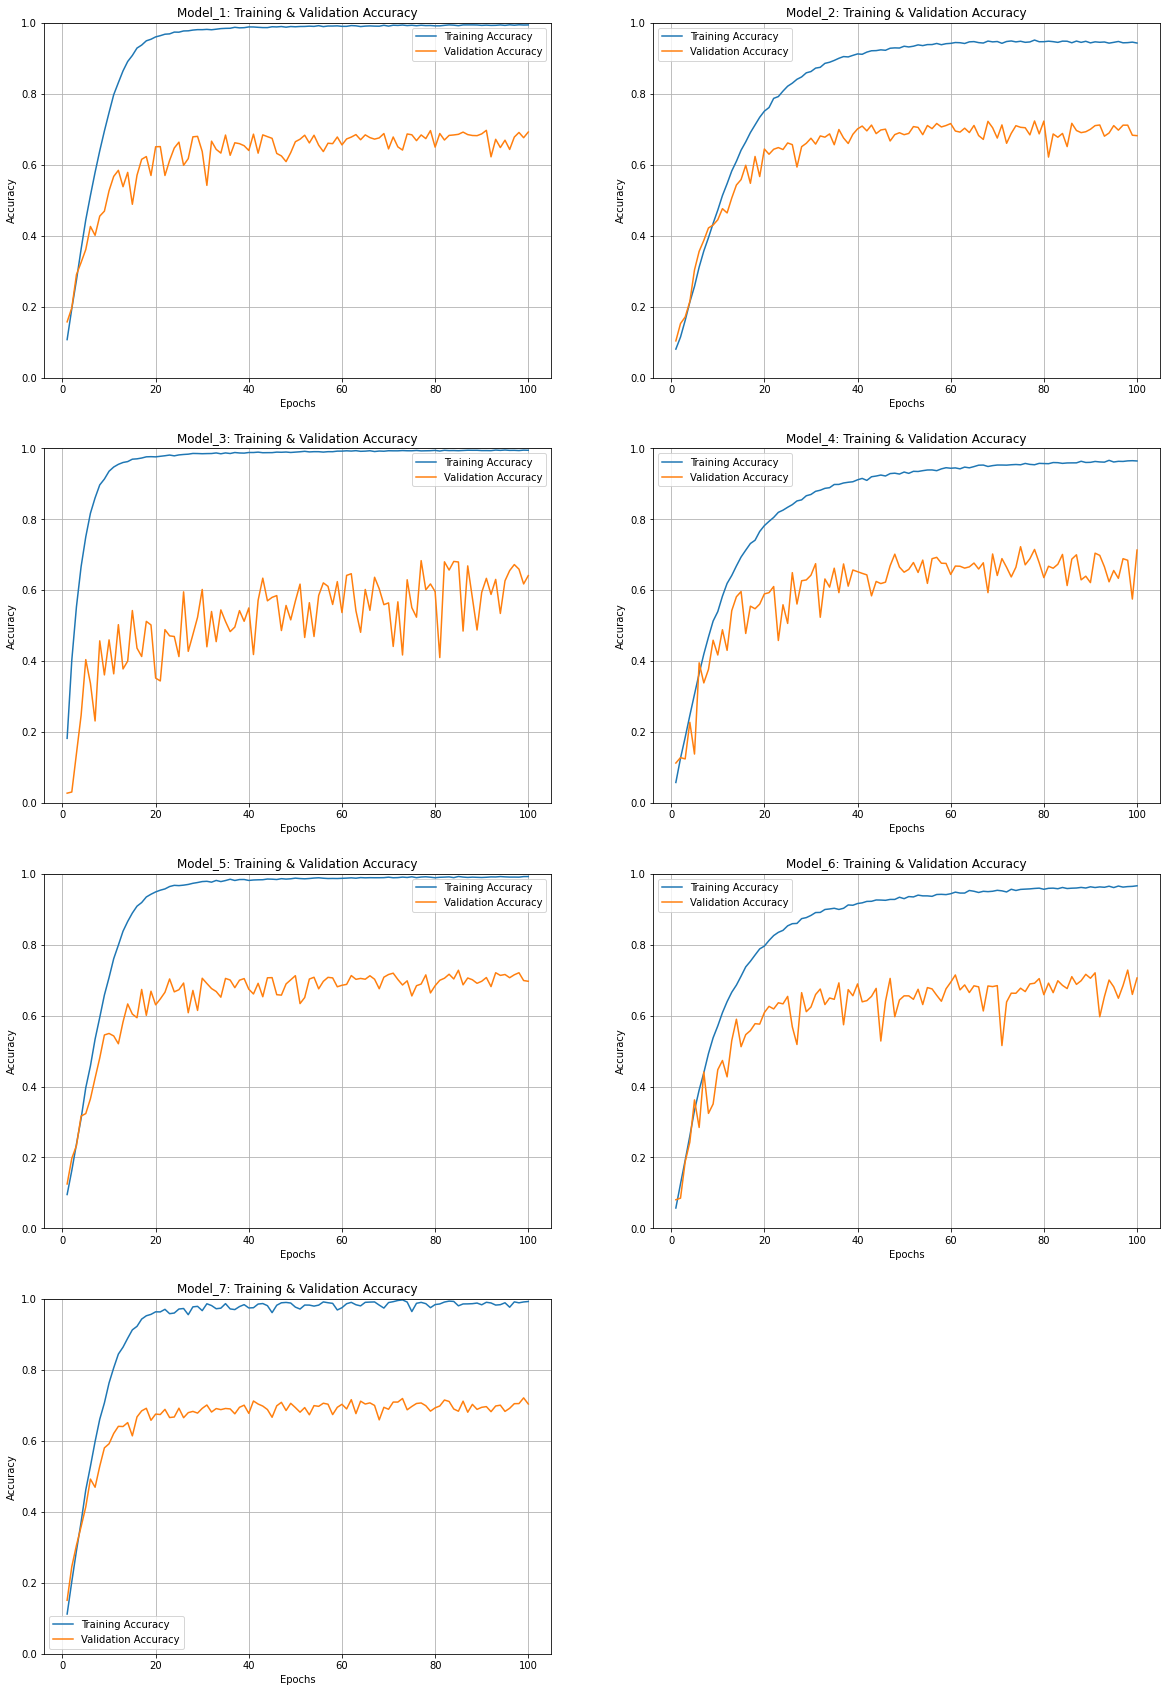

In [46]:
epochs1 = range(1, len(Hist_model_1.history['val_accuracy']) + 1)
epochs2 = range(1, len(Hist_model_2.history['val_accuracy']) + 1)
epochs3 = range(1, len(Hist_model_3.history['val_accuracy']) + 1)
epochs4 = range(1, len(Hist_model_4.history['val_accuracy']) + 1)
epochs5 = range(1, len(Hist_model_5.history['val_accuracy']) + 1)
epochs6 = range(1, len(Hist_model_6.history['val_accuracy']) + 1)
epochs7 = range(1, len(Hist_model_7.history['val_accuracy']) + 1)


plt.figure(figsize = (20, 30))

plt.subplot(4, 2, 1)
plt.plot(epochs1, Hist_model_1.history['accuracy'])
plt.plot(epochs1, Hist_model_1.history['val_accuracy'])
plt.title('Model_1: Training & Validation Accuracy')
plt.ylim(0, 1.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(epochs2, Hist_model_2.history['accuracy'])
plt.plot(epochs2, Hist_model_2.history['val_accuracy'])
plt.title('Model_2: Training & Validation Accuracy')
plt.ylim(0, 1.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 3)
plt.plot(epochs3, Hist_model_3.history['accuracy'])
plt.plot(epochs3, Hist_model_3.history['val_accuracy'])
plt.title('Model_3: Training & Validation Accuracy')
plt.ylim(0, 1.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(epochs4, Hist_model_4.history['accuracy'])
plt.plot(epochs4, Hist_model_4.history['val_accuracy'])
plt.title('Model_4: Training & Validation Accuracy')
plt.ylim(0, 1.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 5)
plt.plot(epochs5, Hist_model_5.history['accuracy'])
plt.plot(epochs5, Hist_model_5.history['val_accuracy'])
plt.title('Model_5: Training & Validation Accuracy')
plt.ylim(0, 1.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(epochs6, Hist_model_6.history['accuracy'])
plt.plot(epochs6, Hist_model_6.history['val_accuracy'])
plt.title('Model_6: Training & Validation Accuracy')
plt.ylim(0, 1.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(4, 2, 7)
plt.plot(epochs7, Hist_model_7.history['accuracy'])
plt.plot(epochs7, Hist_model_7.history['val_accuracy'])
plt.title('Model_7: Training & Validation Accuracy')
plt.ylim(0, 1.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.show()

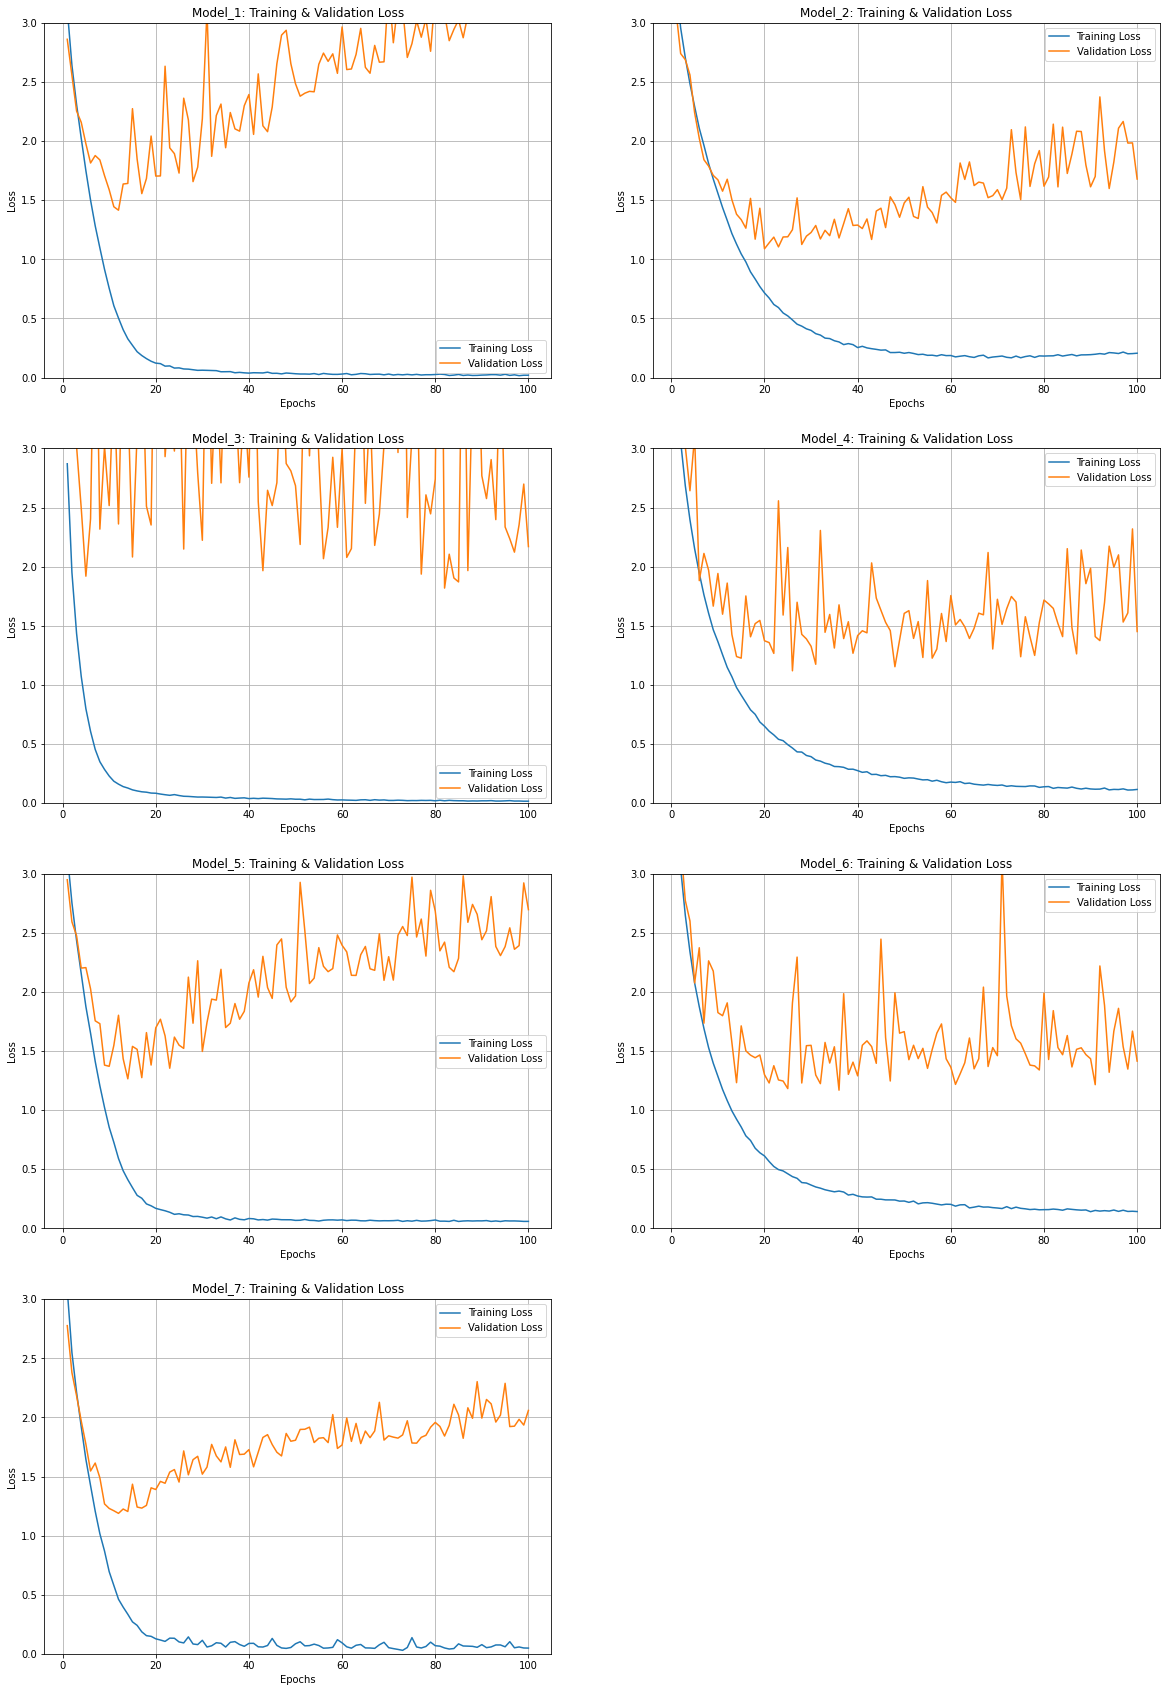

In [47]:
epochs1 = range(1, len(Hist_model_1.history['val_loss']) + 1)
epochs2 = range(1, len(Hist_model_2.history['val_loss']) + 1)
epochs3 = range(1, len(Hist_model_3.history['val_loss']) + 1)
epochs4 = range(1, len(Hist_model_4.history['val_loss']) + 1)
epochs5 = range(1, len(Hist_model_5.history['val_loss']) + 1)
epochs6 = range(1, len(Hist_model_6.history['val_loss']) + 1)
epochs7 = range(1, len(Hist_model_7.history['val_loss']) + 1)

plt.figure(figsize = (20, 30))

plt.subplot(4, 2, 1)
plt.plot(epochs1, Hist_model_1.history['loss'])
plt.plot(epochs1, Hist_model_1.history['val_loss'])
plt.title('Model_1: Training & Validation Loss')
plt.ylim(0, 3.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(epochs1, Hist_model_2.history['loss'])
plt.plot(epochs1, Hist_model_2.history['val_loss'])
plt.title('Model_2: Training & Validation Loss')
plt.ylim(0, 3.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 3)
plt.plot(epochs1, Hist_model_3.history['loss'])
plt.plot(epochs1, Hist_model_3.history['val_loss'])
plt.title('Model_3: Training & Validation Loss')
plt.ylim(0, 3.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 4)
plt.plot(epochs1, Hist_model_4.history['loss'])
plt.plot(epochs1, Hist_model_4.history['val_loss'])
plt.title('Model_4: Training & Validation Loss')
plt.ylim(0, 3.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 5)
plt.plot(epochs1, Hist_model_5.history['loss'])
plt.plot(epochs1, Hist_model_5.history['val_loss'])
plt.title('Model_5: Training & Validation Loss')
plt.ylim(0, 3.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 6)
plt.plot(epochs1, Hist_model_6.history['loss'])
plt.plot(epochs1, Hist_model_6.history['val_loss'])
plt.title('Model_6: Training & Validation Loss')
plt.ylim(0, 3.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.subplot(4, 2, 7)
plt.plot(epochs1, Hist_model_7.history['loss'])
plt.plot(epochs1, Hist_model_7.history['val_loss'])
plt.title('Model_7: Training & Validation Loss')
plt.ylim(0, 3.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()

plt.show()

> ## 6) Model Evaluate

In [33]:
loss1, accuracy1 = model_1.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss1))
print('Accuracy: {: .5f}' .format(accuracy1))

156/156 [==============================] - 0s 3ms/step - loss: 3.5453 - accuracy: 0.6677
Loss:  3.54528
Accuracy:  0.66774


In [34]:
loss2, accuracy2 = model_2.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss2))
print('Accuracy: {: .5f}' .format(accuracy2))

156/156 [==============================] - 0s 3ms/step - loss: 1.7422 - accuracy: 0.6657
Loss:  1.74223
Accuracy:  0.66573


In [35]:
loss3, accuracy3 = model_3.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss3))
print('Accuracy: {: .5f}' .format(accuracy3))

156/156 [==============================] - 0s 3ms/step - loss: 2.2863 - accuracy: 0.6427
Loss:  2.28633
Accuracy:  0.64266


In [36]:
loss4, accuracy4 = model_4.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss4))
print('Accuracy: {: .5f}' .format(accuracy4))

156/156 [==============================] - 0s 3ms/step - loss: 1.4426 - accuracy: 0.7035
Loss:  1.44258
Accuracy:  0.70345


In [37]:
loss5, accuracy5 = model_5.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss5))
print('Accuracy: {: .5f}' .format(accuracy5))

156/156 [==============================] - 0s 3ms/step - loss: 2.8917 - accuracy: 0.6778
Loss:  2.89169
Accuracy:  0.67777


In [38]:
loss6, accuracy6 = model_6.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss6))
print('Accuracy: {: .5f}' .format(accuracy6))

156/156 [==============================] - 0s 3ms/step - loss: 1.5326 - accuracy: 0.6942
Loss:  1.53256
Accuracy:  0.69422


In [48]:
loss7, accuracy7 = model_7.evaluate(X_test, y_test)

print('Loss: {: .5f}' . format(loss7))
print('Accuracy: {: .5f}' .format(accuracy7))

156/156 [==============================] - 0s 3ms/step - loss: 2.2093 - accuracy: 0.6842
Loss:  2.20932
Accuracy:  0.68419


> ## 7) 성능평가

(1) Label Name 지정

In [52]:
import numpy as np
classes = np.array(['G80스포츠', 'G90', 'i30', 'KONA 1', '그랜저 IG', '그랜저HG240', '그랜저',
       '더뉴그랜드스타렉스', '더뉴아반떼AD', '맥스크루즈', '벨로스터', '소나타 LF', '소나타 LPI',
       '소나타 NF', '소나타 YF', '소나타 뉴라이즈', '소나타 하이브리드', '소나타', '스타렉스', '싼타페',
       '아반떼 XD', '아반떼AD', '아반떼MD', '아슬란', '아이오닉 일렉트릭', '아이오닉 하이브리드',
       '에쿠스', '엑센트', '제네시스 G70', '제네시스 G80', '제네시스G380', '투싼1', '투싼',
       '팰리세이드'])
preds4 = model_4.predict(X_test)
preds_single4 = classes[np.argmax(preds4, axis = -1)]
actual_single4 = classes[np.argmax(y_test, axis = -1)]

In [55]:
import numpy as np
classes = np.array(['G80스포츠', 'G90', 'i30', 'KONA 1', '그랜저 IG', '그랜저HG240', '그랜저',
       '더뉴그랜드스타렉스', '더뉴아반떼AD', '맥스크루즈', '벨로스터', '소나타 LF', '소나타 LPI',
       '소나타 NF', '소나타 YF', '소나타 뉴라이즈', '소나타 하이브리드', '소나타', '스타렉스', '싼타페',
       '아반떼 XD', '아반떼AD', '아반떼MD', '아슬란', '아이오닉 일렉트릭', '아이오닉 하이브리드',
       '에쿠스', '엑센트', '제네시스 G70', '제네시스 G80', '제네시스G380', '투싼1', '투싼',
       '팰리세이드'])
preds5 = model_5.predict(X_test)
preds_single5 = classes[np.argmax(preds5, axis = -1)]
actual_single5 = classes[np.argmax(y_test, axis = -1)]

In [57]:
import numpy as np
classes = np.array(['G80스포츠', 'G90', 'i30', 'KONA 1', '그랜저 IG', '그랜저HG240', '그랜저',
       '더뉴그랜드스타렉스', '더뉴아반떼AD', '맥스크루즈', '벨로스터', '소나타 LF', '소나타 LPI',
       '소나타 NF', '소나타 YF', '소나타 뉴라이즈', '소나타 하이브리드', '소나타', '스타렉스', '싼타페',
       '아반떼 XD', '아반떼AD', '아반떼MD', '아슬란', '아이오닉 일렉트릭', '아이오닉 하이브리드',
       '에쿠스', '엑센트', '제네시스 G70', '제네시스 G80', '제네시스G380', '투싼1', '투싼',
       '팰리세이드'])
preds6 = model_6.predict(X_test)
preds_single6 = classes[np.argmax(preds6, axis = -1)]
actual_single6 = classes[np.argmax(y_test, axis = -1)]

(2) 비교 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text

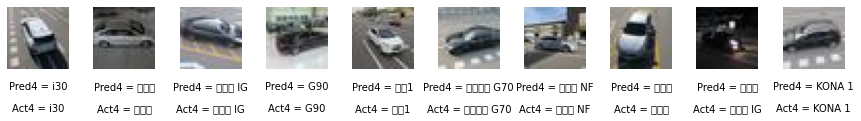

In [54]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35,
            'Pred4 = ' + str(preds_single4[idx]),
            fontsize = 10,
            ha = 'center',
            transform = ax.transAxes)
    ax.text(0.5, -0.7,
            'Act4 = ' + str(actual_single4[idx]),
            fontsize = 10,
            ha = 'center',
            transform = ax.transAxes)
    ax.imshow(img)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48652 missing from current font.
  font.set_

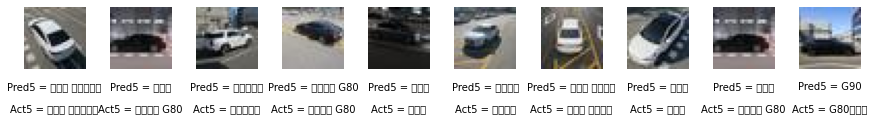

In [56]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35,
            'Pred5 = ' + str(preds_single5[idx]),
            fontsize = 10,
            ha = 'center',
            transform = ax.transAxes)
    ax.text(0.5, -0.7,
            'Act5 = ' + str(actual_single5[idx]),
            fontsize = 10,
            ha = 'center',
            transform = ax.transAxes)
    ax.imshow(img)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text

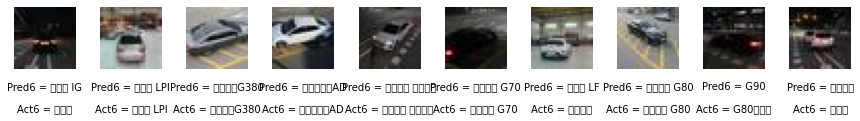

In [59]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35,
            'Pred6 = ' + str(preds_single6[idx]),
            fontsize = 10,
            ha = 'center',
            transform = ax.transAxes)
    ax.text(0.5, -0.7,
            'Act6 = ' + str(actual_single6[idx]),
            fontsize = 10,
            ha = 'center',
            transform = ax.transAxes)
    ax.imshow(img)

> ## 8) 결론

In [60]:
import pandas as pd
df_result = pd.DataFrame({
                          "Model" : ['Default', 'Drop', 'BN', 'BN + Dropout', 'L2', 'L2+BN+Drop', 'L2 + Adam'],
                          "Accuracy" : [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7],
                          "Loss" : [loss1, loss2, loss3, loss4, loss5, loss6, loss7]})
                          
df_result.sort_values(by=['Accuracy'], axis=0, ascending=False)

,Model,Accuracy,Loss
3,BN + Dropout,0.703451,1.442583
5,L2+BN+Drop,0.694221,1.532557
6,L2 + Adam,0.684189,2.209324
4,L2,0.677769,2.891691
0,Default,0.667737,3.545279
1,Drop,0.665730,1.742227
2,BN,0.642657,2.286330


# IV. 프로젝트 의견 작성

### 1. 프로젝트 분야 : 환경, 영화
### 2. 관심분야 : 이미지, 자연어처리
### 3. 기타의견 : 이번 프로젝트에서 같이 하진 못하겠지만, 첫 번째 프로젝트 조원 분들과 잘 맞았습니다. 

# 
# 
# 
# The End
# 
# 
# 